# Problem Statement 
-- The data is related with direct marketing campaigns (phone calls) of banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

-- You will learn how to apply Decision Tree, Random Forest/XGBoost/Adaboost to credibility of the customer. Also learn how to evaluate 

-- Random Forest/XGBoost/Adaboost model using various parameter like on Accuracy, Sensitivity, Specificity and area under the ROC curve. 

-- Build Decision Tree, Random Forest/XGBoost/Adaboost models to predict if the client will subscribe a term deposit. 

# Data Description 
•	age: Age(numeric) of each customer 

•	job: Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

•	marital: Marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed) 

•	education: (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') 

•	default: Has credit in default? (categorical: 'no', 'yes', 'unknown') 

•	housing: Has housing loan? (categorical: 'no', 'yes', 'unknown') 

•	loan: Has personal loan? (categorical: 'no', 'yes', 'unknown') 

•	contact: Contact communication type (categorical: 'cellular','telephone') 

•	month: Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 

•	day_of_week: Last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 

•	duration: Last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 

•	campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact) 

•	pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 

•	previous: Number of contacts performed before this campaign and for this client (numeric) 

•	poutcome: Outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

•	emp.var.rate: Employment variation rate - quarterly indicator (numeric) 

•	cons.price.idx: Consumer price index - monthly indicator (numeric) 

•	cons.conf.idx: Consumer confidence index - monthly indicator (numeric) 

•	euribor3m: Euribor 3-month rate - daily indicator (numeric) 

•	nr.employed: Number of employees - quarterly indicator (numeric) 

•	y - Has the client subscribed a term deposit? (binary: 'yes', 'no') 

# Evaluation Parameters 
Evaluation will be based on: 
•	Data Preparation 
•	Model Comparison 
•	Model Selection 

# Data Preparation 
Analyze the data statistically and treat the multicollinear variables. 

# Model Comparison 
Apply Decision Tree, Random Forest/XGBoost/Adaboost algorithms for every change made in the datasets and compare results. 

# Model Selection 
Model selection to be based on Accuracy, Sensitivity, Specificity, F1 score, and area under the ROC curve. 

# Expected Outcome 
Higher AUC value and F1 Score in predicting the outcome using test data.


In [1]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.set_option('max_rows',10000)
pd.set_option('max_columns',10000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
#importing dataset
df=pd.read_csv('bank-additional-full.csv',sep=";")
df.head()

<IPython.core.display.Javascript object>

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
#checking dimensions
df.shape

(41188, 21)

In [7]:
#checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# checking Dtypes,No. of unique values,Sum of Null values
a=pd.concat([df.dtypes,df.nunique(),df.isnull().sum()],axis=1)
a.columns=['Dtypes','No. of unique values','Sum of Null values']
a

<IPython.core.display.Javascript object>

,Dtypes,No. of unique values,Sum of Null values
age,int64,78,0
job,object,12,0
marital,object,4,0
education,object,8,0
default,object,3,0
housing,object,3,0
loan,object,3,0
contact,object,2,0
month,object,10,0
day_of_week,object,5,0


In [9]:
df.drop_duplicates(inplace=True) # Dropping the duplicate records
df.shape #no_duplicate records

(41176, 21)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [11]:
#checking for if any feature having insignificant values like punctuations....
for i in df.columns:
    if df[i].dtypes=='object':
        print(str(i).upper())
        print(df[i].value_counts())
    else:
        print(i)
        print(df[i].unique())

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
JOB
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
MARITAL
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
EDUCATION
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
DEFAULT
no         32577
unknown     8596
yes            3
Name: default,

In [12]:
#seperating categorical values
df_cat=df.select_dtypes(include="object")
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [13]:
#dropping target feature
df_cat.drop('y',axis=1,inplace=True)

In [14]:
len(df_cat.nunique())

10

In [15]:
#seperating numerical features
df_num=df.select_dtypes(np.number)
df_num.columns

<IPython.core.display.Javascript object>

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [16]:
len(df_num.columns)

10

# EDA

In [17]:
plt.rcParams['figure.figsize']=(11,7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

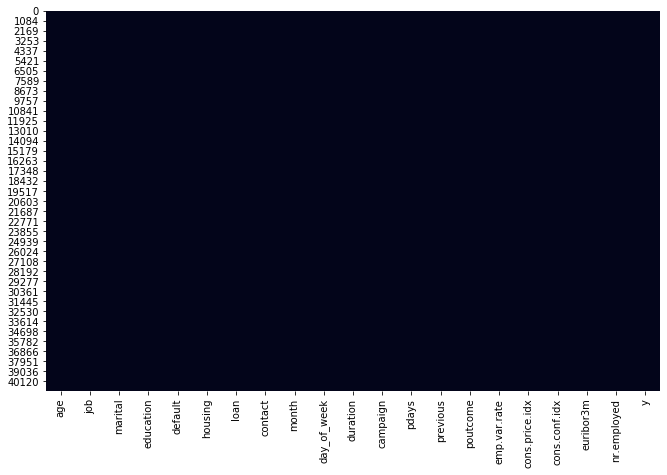

In [18]:
#Checking Null values
sns.heatmap(df.isnull(), cbar = False)

# Visualizing Target variable

<IPython.core.display.Javascript object>

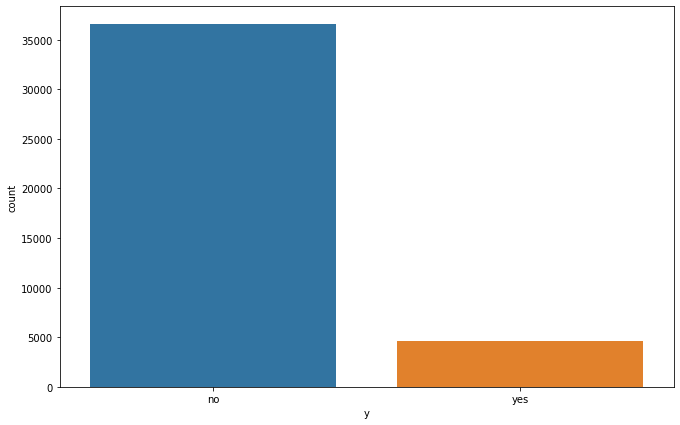

In [19]:
sns.countplot(df['y'])

### Comment:

- Given Binary classification problem Dataset is imbalanced which is biased towards "NO".

# Visualizing Numerical Independent Variables

In [20]:
df_num.nunique()

age                 78
duration          1544
campaign            42
pdays               27
previous             8
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64

In [21]:
df_cat.nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

### UNIVARIATE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

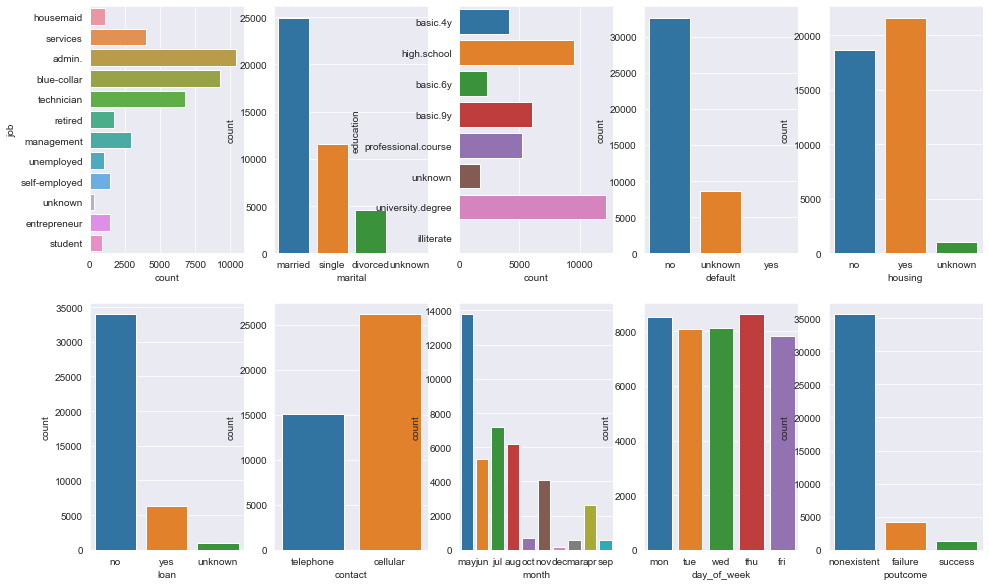

In [22]:
# visualizing count of Categorical Features
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 5, figsize=(16, 10))
sns.countplot(y=df['job'],ax=axes[0,0]) # plotting for job count
sns.countplot('marital',data=df,ax=axes[0,1]) # plotting for marital count
sns.countplot(y=df['education'],ax=axes[0,2]) # plotting for education count
sns.countplot('default',data=df,ax=axes[0,3]) # plotting for default count
sns.countplot('housing',data=df,ax=axes[0,4]) # plotting for housing count
sns.countplot('loan',data=df,ax=axes[1,0]) # plotting for loan count
sns.countplot('contact',data=df,ax=axes[1,1]) # plotting for contact count
sns.countplot('month',data=df,ax=axes[1,2]) # plotting for month count
sns.countplot('day_of_week',data=df,ax=axes[1,3]) # plotting for day_of_week count
sns.countplot('poutcome',data=df,ax=axes[1,4]) # plotting for poutcome count

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

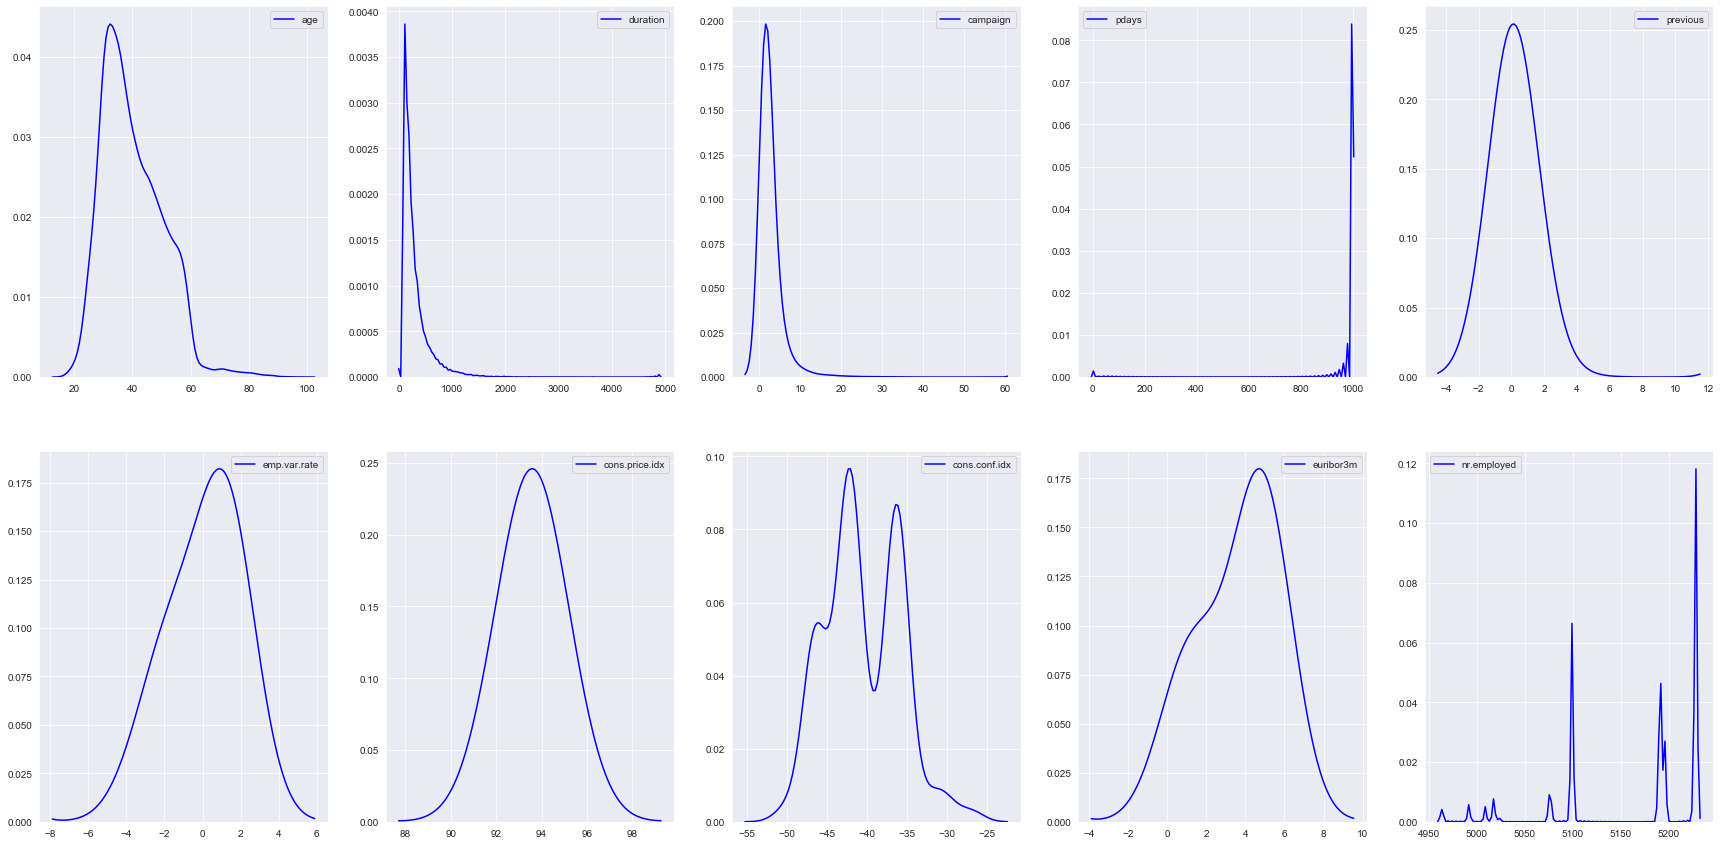

In [23]:
#visualising numerical features distributions
fig,ax=plt.subplots(nrows = 2, ncols = 5,figsize=(30,15))
for i,subplot in zip(list(df_num),ax.flatten()):
    sns.kdeplot(df_num[i],bw=1.5,color='b',ax=subplot)
plt.show()

In [24]:
df.skew()

age               0.784560
duration          3.262808
campaign          4.762044
pdays            -4.921386
previous          3.831396
emp.var.rate     -0.724061
cons.price.idx   -0.230853
cons.conf.idx     0.302876
euribor3m        -0.709194
nr.employed      -1.044317
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

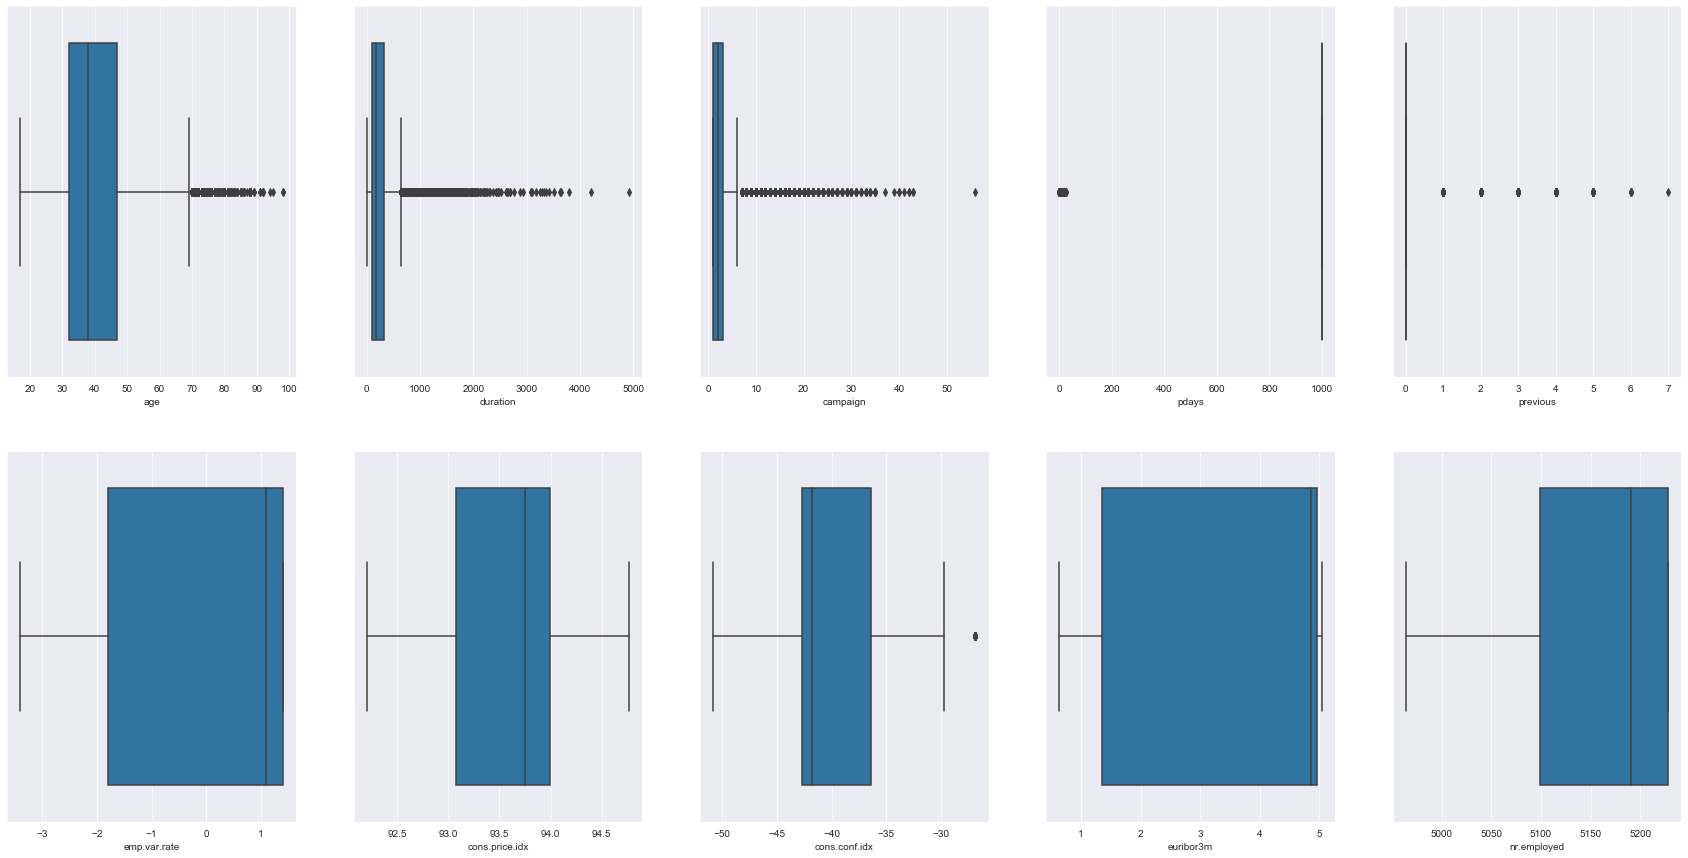

In [25]:
#checking outliers--- Numerical features
fig,ax=plt.subplots(nrows = 2, ncols = 5,figsize=(30,15))
for i,subplot in zip(list(df_num),ax.flatten()):
    sns.boxplot(x=df_num[i],ax=subplot)
plt.show()

## BIVARIATE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

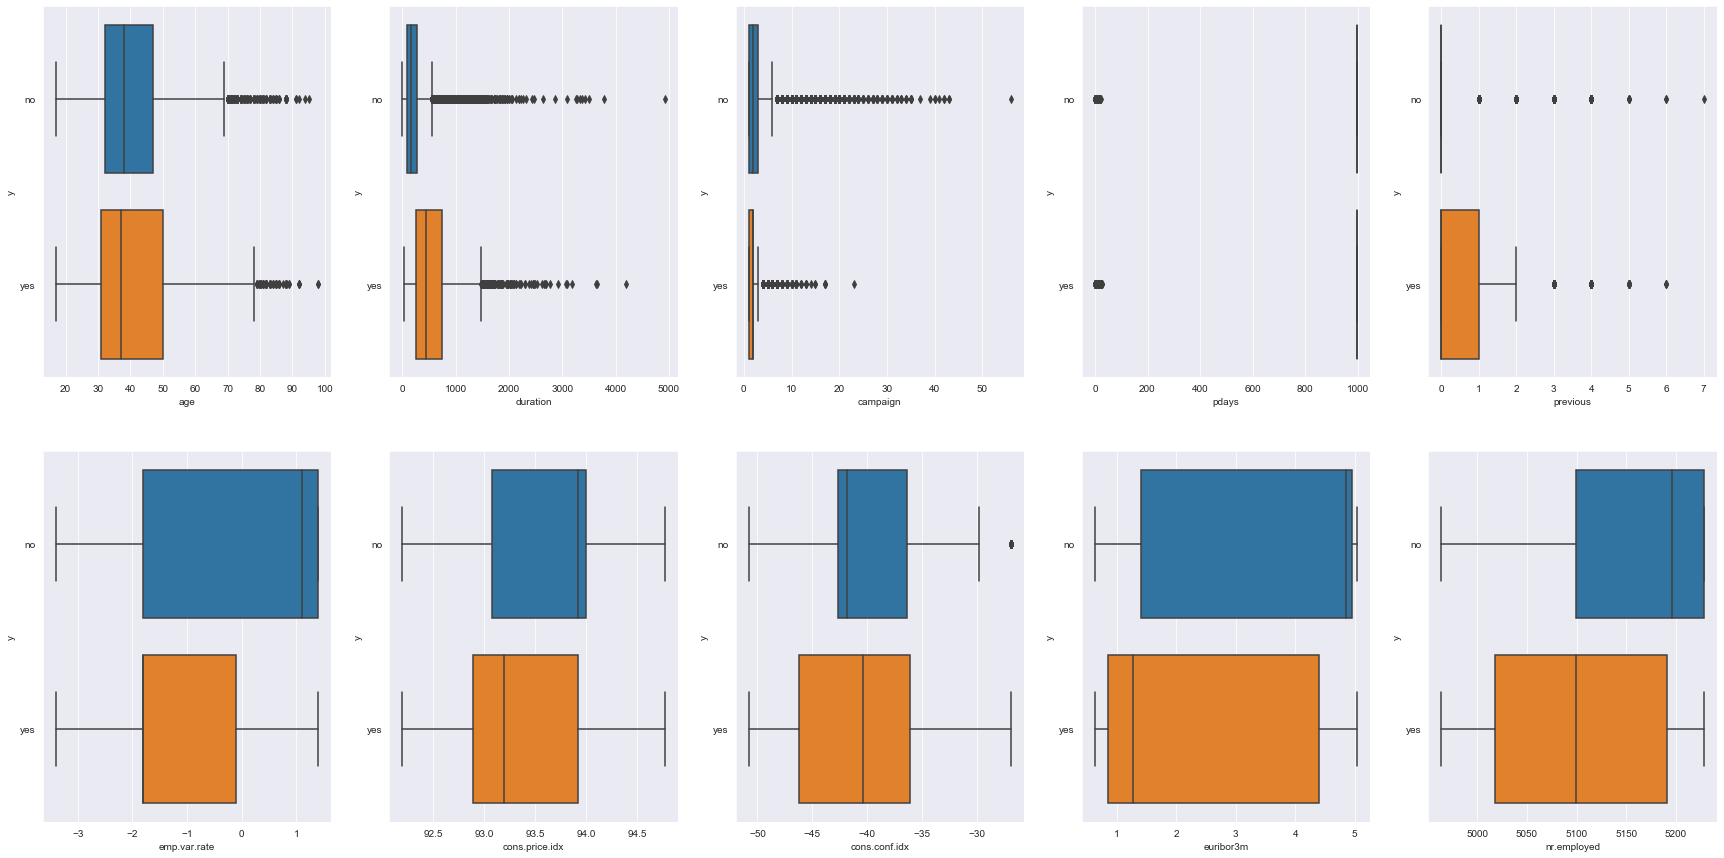

In [26]:
#checking outliers--- target variable Vs Numerical features
fig,ax=plt.subplots(nrows = 2, ncols = 5,figsize=(30,15))
for i,subplot in zip(list(df_num),ax.flatten()):
    sns.boxplot(x=df_num[i],y=df['y'],ax=subplot)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

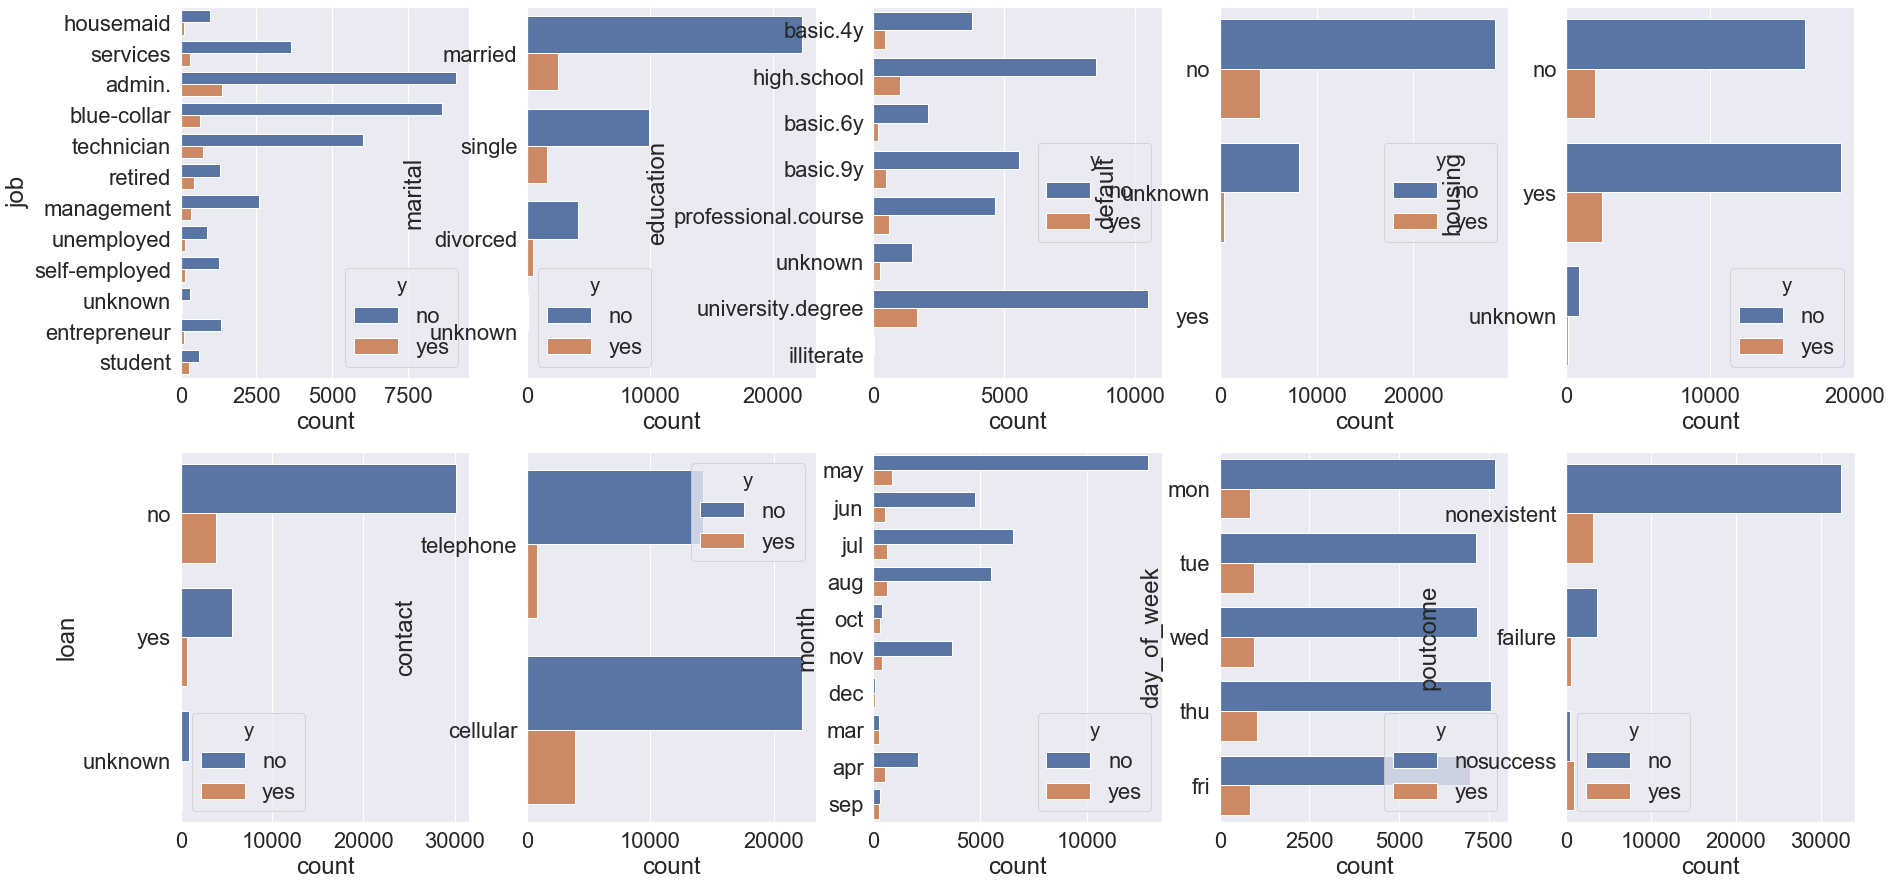

In [27]:
# target variable vs Categorical features
sns.set(font_scale=2)
fig,ax=plt.subplots(nrows = 2, ncols = 5,figsize=(30,15))
for i,subplot in zip(list(df_cat),ax.flatten()):
    sns.countplot(y=df_cat[i],data=df,hue=df['y'],ax=subplot)
plt.show()

In [28]:
df_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

## MULTIVARIATE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

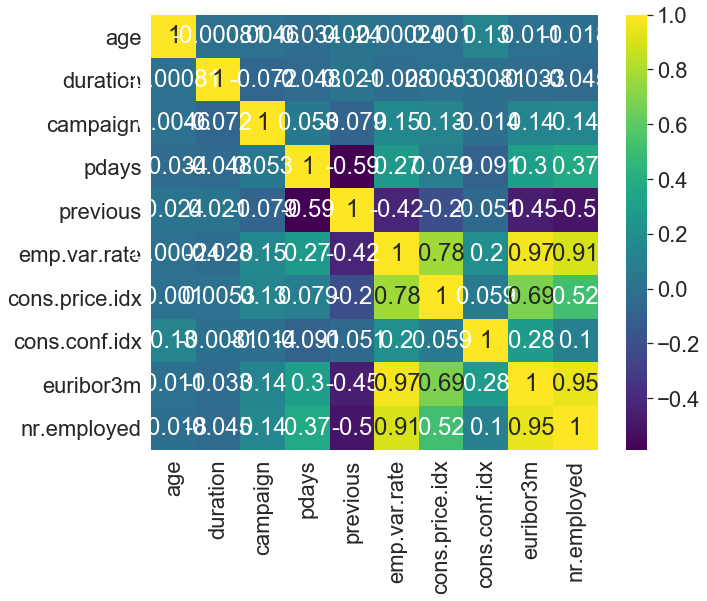

In [29]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

In [30]:
# A more robust way of figuring out correlations other than observations as above is to generate a full correlation
# table with the ranging from -1 to 1
df.corr().style.background_gradient(cmap='coolwarm')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


In [31]:
#Treating Skewness
data_skew=df.skew()
data_skew.index

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [32]:
#highly skewed features
data_skew=data_skew[(data_skew>0.75) | (data_skew<-0.75)]
data_skew.index

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'nr.employed'], dtype='object')

In [33]:
#Handling numerical features values
#Log Transformation
df_num[['age', 'duration', 'campaign', 'pdays', 'previous', 'nr.employed']]=np.log1p(df_num[['age', 'duration', 'campaign', 'pdays', 'previous', 'nr.employed']])

<IPython.core.display.Javascript object>

In [34]:
#Standardisation
from sklearn.preprocessing import StandardScaler
fitt=StandardScaler()
df_num[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]=fitt.fit_transform(df_num[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])

<IPython.core.display.Javascript object>

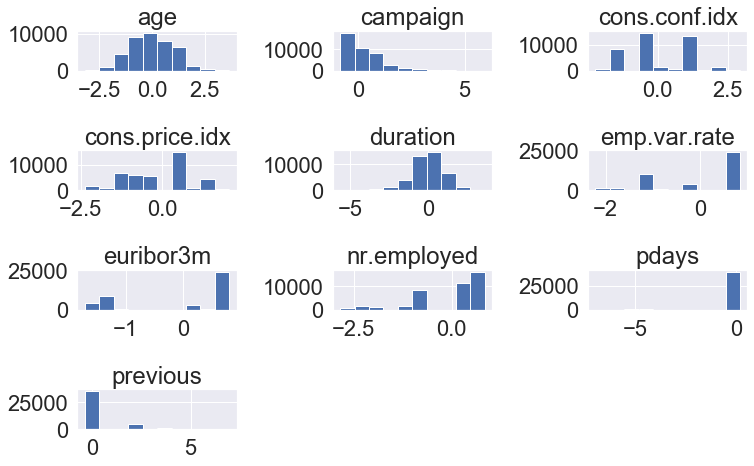

In [35]:
df_num.hist()
plt.tight_layout()

In [36]:
df_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.454196,0.430993,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465
1,1.524487,-0.177216,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465
2,-0.184535,0.274614,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465
3,0.122570,-0.162772,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465
4,1.454196,0.607395,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465


In [37]:
#Handling Categorical Values
from sklearn.preprocessing import OrdinalEncoder
fittt=OrdinalEncoder()
df_cat[df_cat.columns]=fittt.fit_transform(df_cat)

In [38]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0


In [39]:
# Independent variables
indep=pd.concat([df_num,df_cat],axis=1)
indep.head()

<IPython.core.display.Javascript object>

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.454196,0.430993,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
1,1.524487,-0.177216,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0
2,-0.184535,0.274614,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0
3,0.122570,-0.162772,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
4,1.454196,0.607395,-0.866684,0.19441,-0.381474,0.648101,0.722628,0.886568,0.712463,0.335465,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0


In [40]:
# Target variable
from sklearn.preprocessing import LabelEncoder
fit1=LabelEncoder()
df['y']=fit1.fit_transform(df['y'])

In [41]:
df['y'].unique(),df['y'].dtypes

(array([0, 1]), dtype('int32'))

In [42]:
y=df['y']

In [43]:
# Balancing Imbalanced Dataset
from imblearn.over_sampling import RandomOverSampler
fitt2=RandomOverSampler()
x_re,y_re=fitt2.fit_sample(indep,y)

In [44]:
len(x_re),len(y_re)

(73074, 73074)

# BASE MODEL

In [45]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.2,random_state=1)

In [46]:
# import libraries for building models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

#metrics evaluation
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,f1_score,confusion_matrix,classification_report,cohen_kappa_score


In [47]:
#Creating Result Tabulation
result_tab=pd.DataFrame(columns=['Model_name','Model'])

<IPython.core.display.Javascript object>

In [48]:
#Building models and evaluating metrics

models=[DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier(), XGBClassifier()]

def func(model_name):
    for i in models:
        
        global result_tab
        
        print(str(i).upper())
        print()
        
        method=i
        method.fit(x_train,y_train)
        y_pred=method.predict(x_test)
        
        pred_prob1 = method.predict_proba(x_test)
        
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        confusion_mat=confusion_matrix(y_pred,y_test)
        
        print("classification report:   ",classification_report(y_pred,y_test))
        print('PPV: ', 100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0]))
        print('NPV: ', 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[0][1]))

        plt.plot(fpr1, tpr1, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print()
        
        modd=pd.Series({'Model_name':str(model_name)[0:10],
                        'Model': str(i),
                    'AUC Score' : roc_auc_score(y_test, pred_prob1[:,1]),
                    'Precision Score': metrics.precision_score(y_test, y_pred),
                    'Recall Score': metrics.recall_score(y_test, y_pred),
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                    'f1-score': f1_score(y_test, y_pred),
                    "accuracy_score": accuracy_score(y_pred,y_test),
                   "confusion matrix":confusion_matrix(y_pred,y_test),
                    'Sensitivity':100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1]),
                    'Specificity': 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[1][0])})
        
        result_tab=result_tab.append(modd,ignore_index=True)
        
    return result_tab


DECISIONTREECLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.94      1.00      0.97      6942
           1       1.00      0.94      0.97      7673

    accuracy                           0.97     14615
   macro avg       0.97      0.97      0.97     14615
weighted avg       0.97      0.97      0.97     14615

PPV:  93.92504397239887
NPV:  100.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

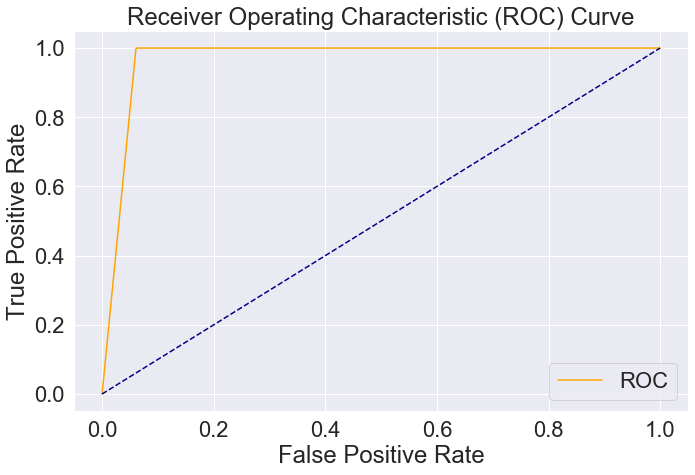

<IPython.core.display.Javascript object>

ADABOOSTCLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.88      0.88      0.88      7347
           1       0.88      0.87      0.88      7268

    accuracy                           0.88     14615
   macro avg       0.88      0.88      0.88     14615
weighted avg       0.88      0.88      0.88     14615

PPV:  87.60654850493844
NPV:  87.92912513842747


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

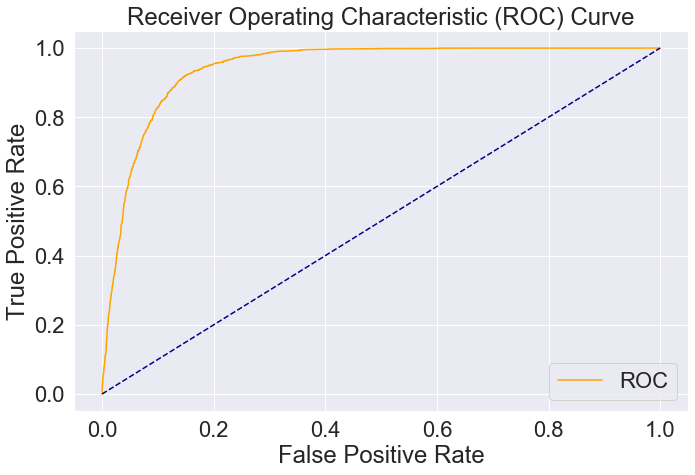

<IPython.core.display.Javascript object>

RANDOMFORESTCLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.94      1.00      0.97      6948
           1       1.00      0.94      0.97      7667

    accuracy                           0.97     14615
   macro avg       0.97      0.97      0.97     14615
weighted avg       0.97      0.97      0.97     14615

PPV:  94.0062237856853
NPV:  100.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

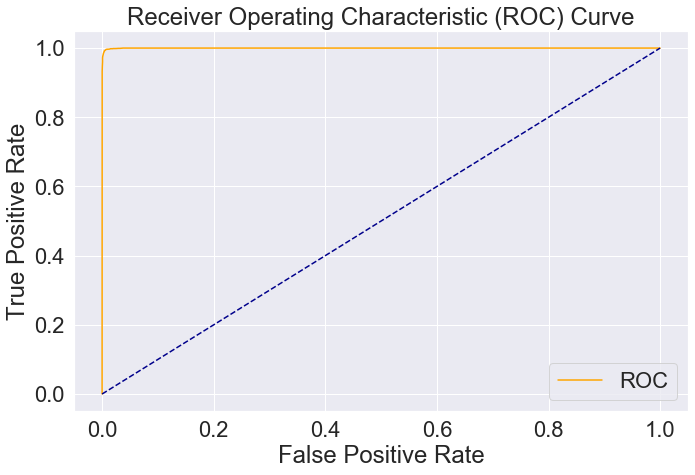

<IPython.core.display.Javascript object>

XGBCLASSIFIER(BASE_SCORE=NONE, BOOSTER=NONE, COLSAMPLE_BYLEVEL=NONE,
              COLSAMPLE_BYNODE=NONE, COLSAMPLE_BYTREE=NONE, GAMMA=NONE,
              GPU_ID=NONE, IMPORTANCE_TYPE='GAIN', INTERACTION_CONSTRAINTS=NONE,
              LEARNING_RATE=NONE, MAX_DELTA_STEP=NONE, MAX_DEPTH=NONE,
              MIN_CHILD_WEIGHT=NONE, MISSING=NAN, MONOTONE_CONSTRAINTS=NONE,
              N_ESTIMATORS=100, N_JOBS=NONE, NUM_PARALLEL_TREE=NONE,
              RANDOM_STATE=NONE, REG_ALPHA=NONE, REG_LAMBDA=NONE,
              SCALE_POS_WEIGHT=NONE, SUBSAMPLE=NONE, TREE_METHOD=NONE,
              VALIDATE_PARAMETERS=FALSE, VERBOSITY=NONE)

classification report:                  precision    recall  f1-score   support

           0       0.89      0.98      0.93      6731
           1       0.98      0.90      0.94      7884

    accuracy                           0.94     14615
   macro avg       0.94      0.94      0.94     14615
weighted avg       0.94      0.94      0.94     14615

PPV:  89.2572

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

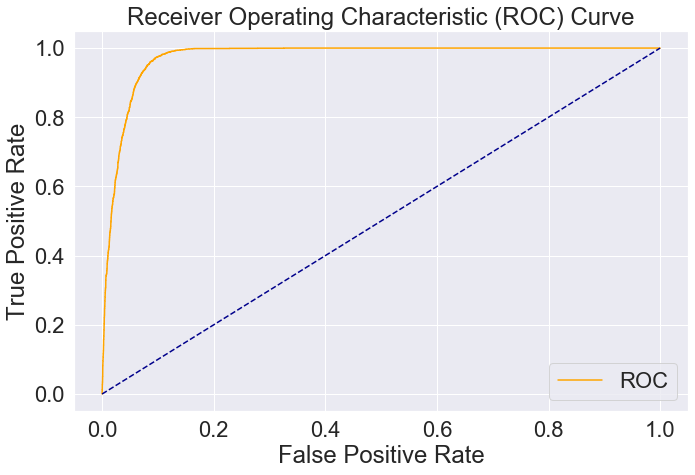

<IPython.core.display.Javascript object>

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,Sensitivity,Specificity,accuracy_score,confusion matrix,f1-score
0,BASE MODEL,DecisionTreeClassifier(),0.969625,0.969278,0.938591,0.941483,1.000000,100.000000,94.148312,0.969278,"[[6942, 0], [449, 7224]]",0.969860
1,BASE MODEL,AdaBoostClassifier(),0.942505,0.877660,0.755305,0.873968,0.879291,88.131210,87.396808,0.877660,"[[6475, 872], [916, 6352]]",0.876622
2,BASE MODEL,RandomForestClassifier(),0.999761,0.969689,0.939411,0.942220,1.000000,100.000000,94.221990,0.969689,"[[6948, 0], [443, 7224]]",0.970250
3,BASE MODEL,"XGBClassifier(base_score=0.5, booster=None, co...",0.974352,0.936504,0.873122,0.899290,0.981451,98.009211,89.928970,0.936504,"[[6597, 134], [794, 7090]]",0.938576


In [49]:
func('BASE MODEL')


# BUILDING  A MODEL BY HANDLING MULTI COLLINEARITY

In [50]:
df_vif_num=df.select_dtypes(np.number)
df_vif_cat=df_cat

<IPython.core.display.Javascript object>

In [51]:
df_num_min=pd.DataFrame()

<IPython.core.display.Javascript object>

In [52]:
from sklearn.preprocessing import MinMaxScaler
fitr=MinMaxScaler()
df_vif_num[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]=fitr.fit_transform(df_vif_num[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])

In [53]:
df_vif_num.shape,df_vif_cat.shape

((41176, 11), (41176, 10))

In [54]:
dff=pd.concat([df_vif_num,df_vif_cat],axis=1)

<IPython.core.display.Javascript object>

In [55]:
vif=pd.DataFrame()
vif['Features']=dff.columns
vif['VIF_Values']=[variance_inflation_factor(dff.values,i) for i in range(dff.shape[1])]
vif.sort_values(by='VIF_Values',ascending=False)

<IPython.core.display.Javascript object>

,Features,VIF_Values
8,euribor3m,255.870843
5,emp.var.rate,255.716264
9,nr.employed,229.458969
3,pdays,75.456014
6,cons.price.idx,55.198316
20,poutcome,18.100567
7,cons.conf.idx,14.992446
0,age,7.207401
18,month,6.389187
12,marital,5.572028


# VIF values < 10

In [56]:
newww=vif[vif['VIF_Values']<10]
list(newww.Features)

['age',
 'duration',
 'campaign',
 'previous',
 'y',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week']

In [57]:
vif_neww=df[newww['Features']]
vif_neww.columns

Index(['age', 'duration', 'campaign', 'previous', 'y', 'job', 'marital',
       'education', 'default', 'housing', 'loan', 'contact', 'month',
       'day_of_week'],
      dtype='object')

In [58]:
vif_10=df[['age', 'duration', 'campaign', 'previous', 'y', 'job', 'marital',
       'education', 'default', 'housing', 'loan', 'contact', 'month',
       'day_of_week']]

In [59]:
vif_10.head()

,age,duration,campaign,previous,y,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,261,1,0,0,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,149,1,0,0,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,226,1,0,0,services,married,high.school,no,yes,no,telephone,may,mon
3,40,151,1,0,0,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,307,1,0,0,services,married,high.school,no,no,yes,telephone,may,mon


In [60]:
vif_10_num=vif_10.select_dtypes(np.number)
vif_10_num.columns

<IPython.core.display.Javascript object>

Index(['age', 'duration', 'campaign', 'previous', 'y'], dtype='object')

In [61]:
vif_10_num.drop('y',axis=1,inplace=True)

In [62]:
vif_10_cat=vif_10.select_dtypes('object')
vif_10_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object')

In [63]:
from sklearn.preprocessing import MinMaxScaler
fit2=MinMaxScaler()
vif_10_num[['age', 'duration', 'campaign', 'previous']]=fit2.fit_transform(vif_10_num[['age', 'duration', 'campaign', 'previous']])

In [64]:
vif_10_cat_dum=pd.get_dummies(vif_10_cat,drop_first=True)

<IPython.core.display.Javascript object>

In [65]:
concat = pd.concat([vif_10_num, vif_10_cat_dum], axis=1)
concat.head()

<IPython.core.display.Javascript object>

,age,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.053070,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0.493827,0.030297,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0.246914,0.045954,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0.283951,0.030704,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0.481481,0.062424,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [66]:
xx=concat
yy=df['y']

In [67]:
# Balancing Imbalanced Dataset
from imblearn.over_sampling import RandomOverSampler
fit2=RandomOverSampler()
x_re,y_re=fit2.fit_resample(xx,yy)

In [68]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.2,random_state=1)

DECISIONTREECLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.92      1.00      0.96      6792
           1       1.00      0.92      0.96      7823

    accuracy                           0.96     14615
   macro avg       0.96      0.96      0.96     14615
weighted avg       0.96      0.96      0.96     14615

PPV:  91.85495873359491
NPV:  99.95847176079734


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

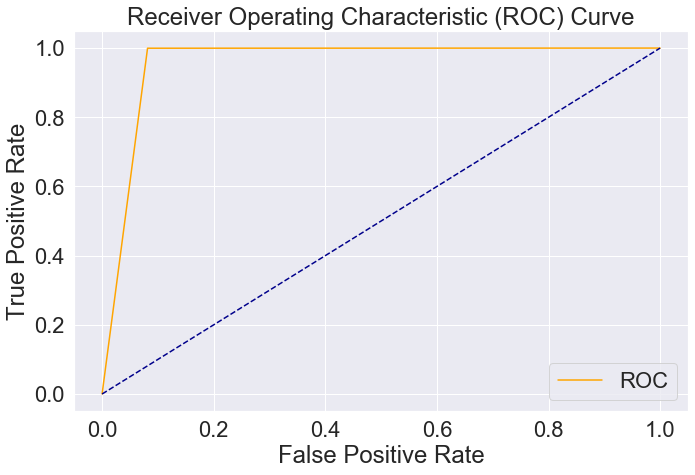

<IPython.core.display.Javascript object>

ADABOOSTCLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.85      0.84      0.84      7506
           1       0.83      0.84      0.84      7109

    accuracy                           0.84     14615
   macro avg       0.84      0.84      0.84     14615
weighted avg       0.84      0.84      0.84     14615

PPV:  84.91408469760519
NPV:  82.9734219269103


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

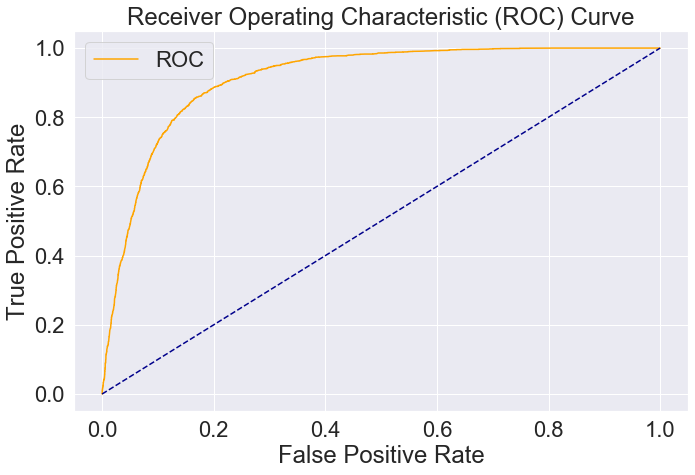

<IPython.core.display.Javascript object>

RANDOMFORESTCLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.94      1.00      0.97      6961
           1       1.00      0.94      0.97      7654

    accuracy                           0.97     14615
   macro avg       0.97      0.97      0.97     14615
weighted avg       0.97      0.97      0.97     14615

PPV:  94.18211338113922
NPV:  100.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

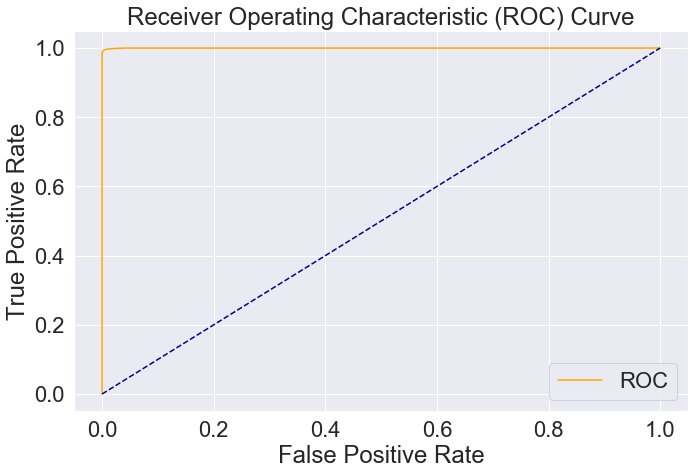

<IPython.core.display.Javascript object>

XGBCLASSIFIER(BASE_SCORE=0.5, BOOSTER=NONE, COLSAMPLE_BYLEVEL=1,
              COLSAMPLE_BYNODE=1, COLSAMPLE_BYTREE=1, GAMMA=0, GPU_ID=-1,
              IMPORTANCE_TYPE='GAIN', INTERACTION_CONSTRAINTS=NONE,
              LEARNING_RATE=0.300000012, MAX_DELTA_STEP=0, MAX_DEPTH=6,
              MIN_CHILD_WEIGHT=1, MISSING=NAN, MONOTONE_CONSTRAINTS=NONE,
              N_ESTIMATORS=100, N_JOBS=0, NUM_PARALLEL_TREE=1, RANDOM_STATE=0,
              REG_ALPHA=0, REG_LAMBDA=1, SCALE_POS_WEIGHT=1, SUBSAMPLE=1,
              TREE_METHOD=NONE, VALIDATE_PARAMETERS=FALSE, VERBOSITY=NONE)

classification report:                  precision    recall  f1-score   support

           0       0.87      0.94      0.90      6892
           1       0.94      0.88      0.91      7723

    accuracy                           0.91     14615
   macro avg       0.91      0.91      0.91     14615
weighted avg       0.91      0.91      0.91     14615

PPV:  87.41712894060343
NPV:  94.03377630121817


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

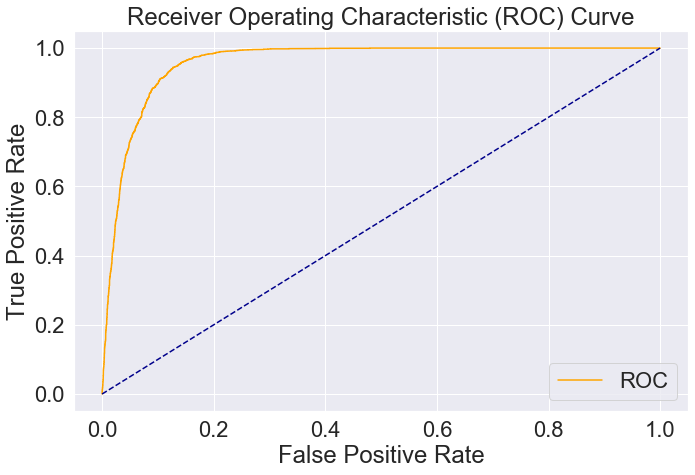

<IPython.core.display.Javascript object>

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,Sensitivity,Specificity,accuracy_score,confusion matrix,f1-score
0,BASE MODEL,DecisionTreeClassifier(),0.969625,0.969278,0.938591,0.941483,1.000000,100.000000,94.148312,0.969278,"[[6942, 0], [449, 7224]]",0.969860
1,BASE MODEL,AdaBoostClassifier(),0.942505,0.877660,0.755305,0.873968,0.879291,88.131210,87.396808,0.877660,"[[6475, 872], [916, 6352]]",0.876622
2,BASE MODEL,RandomForestClassifier(),0.999761,0.969689,0.939411,0.942220,1.000000,100.000000,94.221990,0.969689,"[[6948, 0], [443, 7224]]",0.970250
3,BASE MODEL,"XGBClassifier(base_score=0.5, booster=None, co...",0.974352,0.936504,0.873122,0.899290,0.981451,98.009211,89.928970,0.936504,"[[6597, 134], [794, 7090]]",0.938576
4,VIF<10,DecisionTreeClassifier(),0.959067,0.958604,0.917275,0.923047,0.999585,99.955830,92.304742,0.958604,"[[6789, 3], [602, 7221]]",0.959793
5,VIF<10,AdaBoostClassifier(),0.911779,0.839548,0.678997,0.843157,0.829734,83.613110,84.315656,0.839548,"[[6276, 1230], [1115, 5994]]",0.836392
6,VIF<10,RandomForestClassifier(),0.999907,0.970578,0.941188,0.943820,1.000000,100.000000,94.382022,0.970578,"[[6961, 0], [430, 7224]]",0.971098
7,VIF<10,"XGBClassifier(base_score=0.5, booster=None, co...",0.958831,0.906876,0.813874,0.879580,0.940338,93.746373,87.958047,0.906876,"[[6461, 431], [930, 6793]]",0.908945


In [69]:
func(str('VIF<10'))


# VIF values < 5

In [70]:
neww1=vif[vif['VIF_Values']<5]
list(neww1.Features)

['duration',
 'campaign',
 'previous',
 'y',
 'job',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'day_of_week']

In [71]:
vif_neww11=df[neww1['Features']]
vif_neww11.columns

Index(['duration', 'campaign', 'previous', 'y', 'job', 'education', 'default',
       'housing', 'loan', 'contact', 'day_of_week'],
      dtype='object')

In [72]:
vif_5=df[['duration', 'campaign', 'previous', 'y', 'job', 'education', 'default',
       'housing', 'loan', 'contact', 'day_of_week']]

In [73]:
vif_5_num=vif_5.select_dtypes(np.number)
vif_5_num.columns

<IPython.core.display.Javascript object>

Index(['duration', 'campaign', 'previous', 'y'], dtype='object')

In [74]:
vif_5_cat=vif_5.select_dtypes('object')
vif_5_cat.columns

Index(['job', 'education', 'default', 'housing', 'loan', 'contact',
       'day_of_week'],
      dtype='object')

In [75]:
vif_5_cat_dum=pd.get_dummies(vif_5_cat,drop_first=True)

<IPython.core.display.Javascript object>

In [76]:
concatt = pd.concat([vif_5_num, vif_5_cat_dum], axis=1)
concatt.drop('y',axis=1,inplace=True)

<IPython.core.display.Javascript object>

In [77]:
xxx=concatt
yyy=df['y']

In [78]:
# Balancing Imbalanced Dataset
from imblearn.over_sampling import RandomOverSampler
fit2=RandomOverSampler()
x_re,y_re=fit2.fit_resample(xxx,yyy)

In [79]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.2,random_state=1)

DECISIONTREECLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.91      1.00      0.95      6732
           1       1.00      0.92      0.96      7883

    accuracy                           0.95     14615
   macro avg       0.95      0.96      0.95     14615
weighted avg       0.96      0.95      0.95     14615

PPV:  91.01610066296847
NPV:  99.93078626799557


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

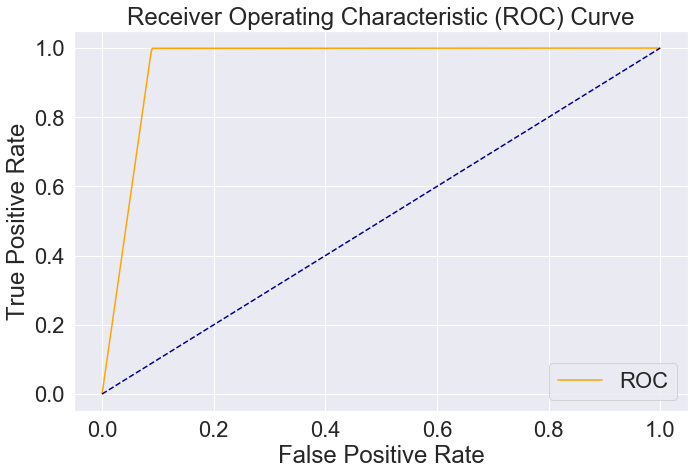

<IPython.core.display.Javascript object>

ADABOOSTCLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.82      0.81      0.82      7449
           1       0.81      0.81      0.81      7166

    accuracy                           0.81     14615
   macro avg       0.81      0.81      0.81     14615
weighted avg       0.81      0.81      0.81     14615

PPV:  81.92396157488838
NPV:  80.703211517165


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

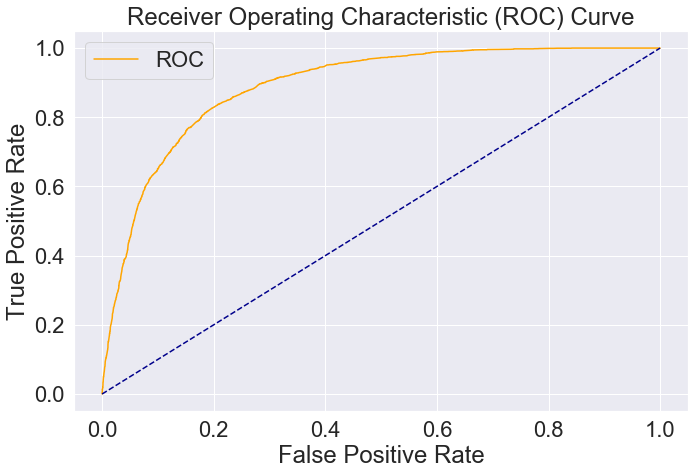

<IPython.core.display.Javascript object>

RANDOMFORESTCLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.92      1.00      0.96      6837
           1       1.00      0.93      0.96      7778

    accuracy                           0.96     14615
   macro avg       0.96      0.96      0.96     14615
weighted avg       0.96      0.96      0.96     14615

PPV:  92.47733730212421
NPV:  99.97231450719823


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

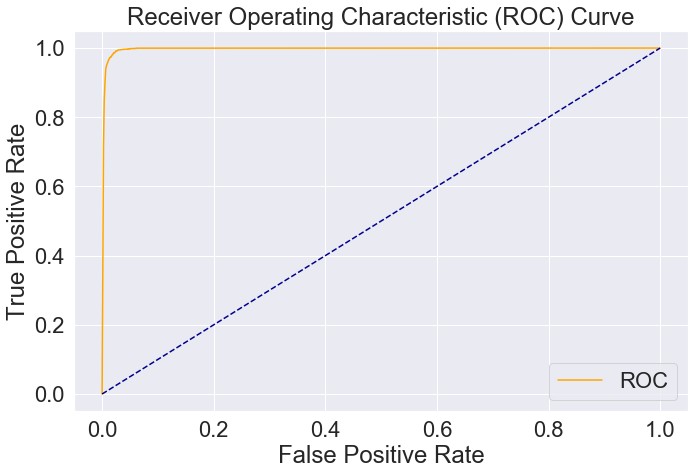

<IPython.core.display.Javascript object>

XGBCLASSIFIER(BASE_SCORE=0.5, BOOSTER=NONE, COLSAMPLE_BYLEVEL=1,
              COLSAMPLE_BYNODE=1, COLSAMPLE_BYTREE=1, GAMMA=0, GPU_ID=-1,
              IMPORTANCE_TYPE='GAIN', INTERACTION_CONSTRAINTS=NONE,
              LEARNING_RATE=0.300000012, MAX_DELTA_STEP=0, MAX_DEPTH=6,
              MIN_CHILD_WEIGHT=1, MISSING=NAN, MONOTONE_CONSTRAINTS=NONE,
              N_ESTIMATORS=100, N_JOBS=0, NUM_PARALLEL_TREE=1, RANDOM_STATE=0,
              REG_ALPHA=0, REG_LAMBDA=1, SCALE_POS_WEIGHT=1, SUBSAMPLE=1,
              TREE_METHOD=NONE, VALIDATE_PARAMETERS=FALSE, VERBOSITY=NONE)

classification report:                  precision    recall  f1-score   support

           0       0.82      0.90      0.86      6807
           1       0.90      0.83      0.87      7808

    accuracy                           0.86     14615
   macro avg       0.86      0.86      0.86     14615
weighted avg       0.87      0.86      0.86     14615

PPV:  82.4381003923691
NPV:  90.11627906976744


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

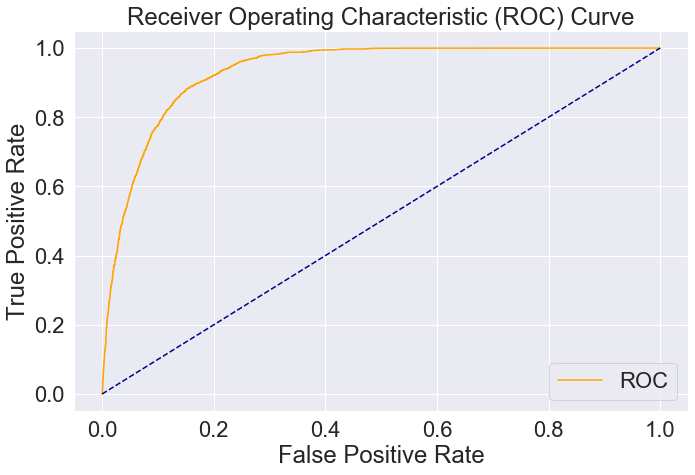

<IPython.core.display.Javascript object>

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,Sensitivity,Specificity,accuracy_score,confusion matrix,f1-score
0,BASE MODEL,DecisionTreeClassifier(),0.969625,0.969278,0.938591,0.941483,1.000000,100.000000,94.148312,0.969278,"[[6942, 0], [449, 7224]]",0.969860
1,BASE MODEL,AdaBoostClassifier(),0.942505,0.877660,0.755305,0.873968,0.879291,88.131210,87.396808,0.877660,"[[6475, 872], [916, 6352]]",0.876622
2,BASE MODEL,RandomForestClassifier(),0.999761,0.969689,0.939411,0.942220,1.000000,100.000000,94.221990,0.969689,"[[6948, 0], [443, 7224]]",0.970250
3,BASE MODEL,"XGBClassifier(base_score=0.5, booster=None, co...",0.974352,0.936504,0.873122,0.899290,0.981451,98.009211,89.928970,0.936504,"[[6597, 134], [794, 7090]]",0.938576
4,VIF<10,DecisionTreeClassifier(),0.959067,0.958604,0.917275,0.923047,0.999585,99.955830,92.304742,0.958604,"[[6789, 3], [602, 7221]]",0.959793
5,VIF<10,AdaBoostClassifier(),0.911779,0.839548,0.678997,0.843157,0.829734,83.613110,84.315656,0.839548,"[[6276, 1230], [1115, 5994]]",0.836392
6,VIF<10,RandomForestClassifier(),0.999907,0.970578,0.941188,0.943820,1.000000,100.000000,94.382022,0.970578,"[[6961, 0], [430, 7224]]",0.971098
7,VIF<10,"XGBClassifier(base_score=0.5, booster=None, co...",0.958831,0.906876,0.813874,0.879580,0.940338,93.746373,87.958047,0.906876,"[[6461, 431], [930, 6793]]",0.908945
8,VIF<5,DecisionTreeClassifier(),0.955263,0.954225,0.908533,0.915768,0.999308,99.925728,91.576811,0.954225,"[[6727, 5], [664, 7219]]",0.955716
9,VIF<5,AdaBoostClassifier(),0.889688,0.813206,0.626329,0.813564,0.807032,81.286079,81.356405,0.813206,"[[6055, 1394], [1336, 5830]]",0.810285


In [80]:
func(str('VIF<5'))


In [93]:
result_tab.sort_values(by=['AUC Score','f1-score'],ascending=[False,False])

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,Sensitivity,Specificity,accuracy_score,confusion matrix,f1-score
6,VIF<10,RandomForestClassifier(),0.999907,0.970578,0.941188,0.943820,1.000000,100.000000,94.382022,0.970578,"[[6961, 0], [430, 7224]]",0.971098
2,BASE MODEL,RandomForestClassifier(),0.999761,0.969689,0.939411,0.942220,1.000000,100.000000,94.221990,0.969689,"[[6948, 0], [443, 7224]]",0.970250
10,VIF<5,RandomForestClassifier(),0.997158,0.961820,0.923696,0.928516,0.999723,99.970747,92.851633,0.961820,"[[6835, 2], [556, 7222]]",0.962805
3,BASE MODEL,"XGBClassifier(base_score=0.5, booster=None, co...",0.974352,0.936504,0.873122,0.899290,0.981451,98.009211,89.928970,0.936504,"[[6597, 134], [794, 7090]]",0.938576
0,BASE MODEL,DecisionTreeClassifier(),0.969625,0.969278,0.938591,0.941483,1.000000,100.000000,94.148312,0.969278,"[[6942, 0], [449, 7224]]",0.969860
4,VIF<10,DecisionTreeClassifier(),0.959067,0.958604,0.917275,0.923047,0.999585,99.955830,92.304742,0.958604,"[[6789, 3], [602, 7221]]",0.959793
7,VIF<10,"XGBClassifier(base_score=0.5, booster=None, co...",0.958831,0.906876,0.813874,0.879580,0.940338,93.746373,87.958047,0.906876,"[[6461, 431], [930, 6793]]",0.908945
8,VIF<5,DecisionTreeClassifier(),0.955263,0.954225,0.908533,0.915768,0.999308,99.925728,91.576811,0.954225,"[[6727, 5], [664, 7219]]",0.955716
1,BASE MODEL,AdaBoostClassifier(),0.942505,0.877660,0.755305,0.873968,0.879291,88.131210,87.396808,0.877660,"[[6475, 872], [916, 6352]]",0.876622
11,VIF<5,"XGBClassifier(base_score=0.5, booster=None, co...",0.934013,0.862333,0.724882,0.833760,0.901163,89.510798,83.376025,0.862333,"[[6093, 714], [1298, 6510]]",0.866152


# VIF<10--RandomForestClassifier() best model to predict if the client will subscribe a term deposit. 
